#Playing Cards Classifier
#####by: Aizhar John M. Quindoza - MEP-CpE - Mapua University
#####John Rey Magahis (Complete details here)
#####Karl Cedric Miguel (Complete details here)
######Submitted to: Ms. Cherry Casuat

1. Install kaggle

In [ ]:
!pip install kaggle

2. Mount your Google Drive as storage of cards dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Create a folder to the kaggle directory

In [ ]:
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle_json/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

4. Install timm

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

5. Download the playing cards dataset from kaggle

In [ ]:
! kaggle datasets download gpiosenka/cards-image-datasetclassification

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification
License(s): CC0-1.0
100% 385M/385M [00:22<00:00, 23.4MB/s]
100% 385M/385M [00:22<00:00, 17.7MB/s]


6. Unzip the downloaded dataset

In [ ]:
! unzip cards-image-datasetclassification

Streaming output truncated to the last 5000 lines.
  inflating: train/jack of spades/059.jpg  
  inflating: train/jack of spades/060.jpg  
  inflating: train/jack of spades/061.jpg  
  inflating: train/jack of spades/062.jpg  
  inflating: train/jack of spades/063.jpg  
  inflating: train/jack of spades/064.jpg  
  inflating: train/jack of spades/065.jpg  
  inflating: train/jack of spades/066.jpg  
  inflating: train/jack of spades/067.jpg  
  inflating: train/jack of spades/068.jpg  
  inflating: train/jack of spades/069.jpg  
  inflating: train/jack of spades/070.jpg  
  inflating: train/jack of spades/071.jpg  
  inflating: train/jack of spades/072.jpg  
  inflating: train/jack of spades/073.jpg  
  inflating: train/jack of spades/074.jpg  
  inflating: train/jack of spades/075.jpg  
  inflating: train/jack of spades/076.jpg  
  inflating: train/jack of spades/077.jpg  
  inflating: train/jack of spades/078.jpg  
  inflating: train/jack of spades/079.jpg  
  inflating: train/jack o

7. Import Pytorch and its utilities

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as tranforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

8. Create a Pytorch dataset class for playing cards

In [ ]:
class PlayingCardDataset(Dataset):
  def __init__(self, data_dir, transform=None):
    self.data = ImageFolder(data_dir, transform=transform)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):
    return self.data[index]

  @property
  def classes(self):
    return self.data.classes

9. Test the dataset (optional)

In [ ]:
train_dataset = '/content/train'
dataset = PlayingCardDataset(data_dir=train_dataset)
len(dataset)

7624

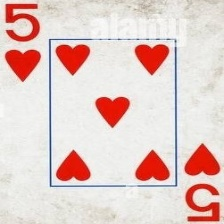

In [ ]:
image, label = dataset[1500]
image

10. Create Label Mapping Dictionary

In [ ]:
target_to_class = {v: k for k, v in ImageFolder(train_dataset).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

11. Resize and Transform Images for Consistency

In [ ]:
transform = tranforms.Compose([
    tranforms.Resize((128, 128)),
    tranforms.ToTensor()
])

dataset = PlayingCardDataset(train_dataset, transform)

12. Test if the shape is 128x128

In [ ]:
image, label = dataset[100]
image.shape

torch.Size([3, 128, 128])

13. Iterate over the dataset

In [ ]:
for image, label in dataset:
  break

14. Create the dataloader

In [ ]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

15. Iterate images and labels through the dataloader

In [ ]:
for images, labels in dataloader:
  break

16. Create a Neural Network class using the EfficientNet model

In [ ]:
class SimpleCardClassifier(nn.Module):
  def __init__(self, num_classes=53):
    super(SimpleCardClassifier, self).__init__()

    # Where we define all the parts of the model
    self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
    self.features = nn.Sequential(*list(self.base_model.children())[:-1])

    enet_out_size = 1280

    # Make a classifier
    self.classifier = nn.Linear(enet_out_size, num_classes)

  def forward(self, x):
    # Connect these parts and return the output
    x = self.features(x)
    output = self.classifier(x)
    return output

17. Test the model

In [ ]:
model = SimpleCardClassifier(num_classes=53)
print(model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

SimpleCardClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, ke

In [ ]:
example_out = model(images)
example_out.shape #[batch_size, num_classes]

torch.Size([32, 53])

18. Train the Model

In [ ]:
# Create loss function
criterion = nn.CrossEntropyLoss()
# Create optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
criterion(example_out, labels)
print(example_out.shape, labels.shape)

torch.Size([32, 53]) torch.Size([32])


19. Setup Datasets

In [ ]:
transform = tranforms.Compose([
    tranforms.Resize((128, 128)),
    tranforms.ToTensor()
])

train_folder = '/content/train'
valid_folder = '/content/valid'
test_folder = '/content/test'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, shuffle=False)

20. Implement an early stopping class to prevent overfitting and improve efficiency

In [ ]:
! pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 51.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# Early stopping
import copy

class EarlyStopping():
  def __init__(self, patience=5, min_delta=0, restore_best_weights=True):
    self.patience = patience
    self.min_delta = min_delta
    self.restore_best_weights = restore_best_weights
    self.best_model = None
    self.best_loss = None
    self.counter = 0
    self.status = ""

  def __call__(self, model, val_loss):
    if self.best_loss == None:
      self.best_loss = val_loss
      self.best_model = copy.deepcopy(model)
    elif self.best_loss - val_loss > self.min_delta:
      self.best_loss = val_loss
      self.counter = 0
      self.best_model.load_state_dict(model.state_dict())
    elif self.best_loss - val_loss < self.min_delta:
      self.counter += 1
      if self.counter >= self.patience:
        self.status = f"Stopped on {self.counter}"
        if self.restore_best_weights:
          model.load_state_dict(self.best_model.state_dict())
        return True
    self.status = f"{self.counter}/{self.patience}"
    return False

21. Train the Card Classifier Model

In [ ]:
num_epochs = 10
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Optimize performance on Apple Silicon Processors
if torch.backends.mps.is_available():
    device = torch.device("mps")

print("Selected device",device)

model = SimpleCardClassifier(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
es = EarlyStopping(patience=3)

epoch = 0
done = False
while epoch < num_epochs and not done:
    epoch += 1
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

    # Check early stopping criteria
    done = es(model, val_loss)
    print(f"Early Stopping: {es.status}")

Selected device cuda:0
Epoch 1/10 - Train loss: 1.5158730889167265, Validation loss: 0.3450874576028788
Early Stopping: 0/3
Epoch 2/10 - Train loss: 0.5753625579420693, Validation loss: 0.33974836108819495
Early Stopping: 0/3
Epoch 3/10 - Train loss: 0.352780805500019, Validation loss: 0.26316401463634564
Early Stopping: 0/3
Epoch 4/10 - Train loss: 0.24561118773904952, Validation loss: 0.1727287544394439
Early Stopping: 0/3
Epoch 5/10 - Train loss: 0.2063390537001904, Validation loss: 0.14069196278194213
Early Stopping: 0/3
Epoch 6/10 - Train loss: 0.15481986388454658, Validation loss: 0.1464502217634669
Early Stopping: 1/3
Epoch 7/10 - Train loss: 0.12919417481599738, Validation loss: 0.13629325498949807
Early Stopping: 0/3
Epoch 8/10 - Train loss: 0.131544680366877, Validation loss: 0.1513936326188861
Early Stopping: 1/3
Epoch 9/10 - Train loss: 0.10608521522905244, Validation loss: 0.15806067838983714
Early Stopping: 2/3
Epoch 10/10 - Train loss: 0.12751952976434017, Validation los

22. Visualize the loss

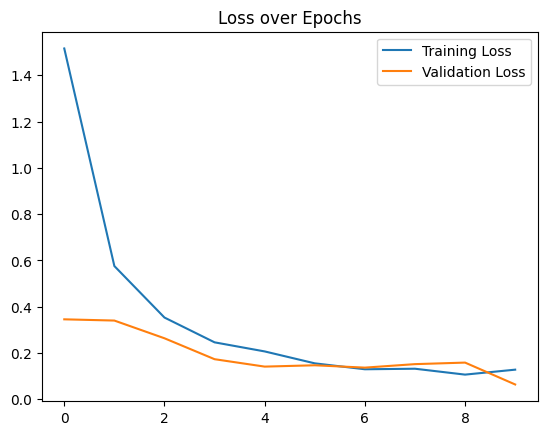

In [ ]:
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()

23. Test the accuracy of the model

In [ ]:
from sklearn.metrics import accuracy_score

model.eval()
true_labels = []
predicted_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predictions = torch.max(outputs, 1)  # Get the class index with the highest probability
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predictions.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 94.72%


24. Create a confusion matrix

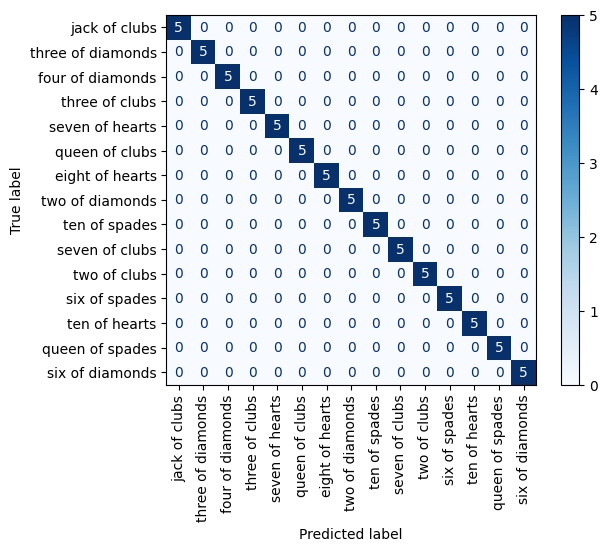

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Identify the top 10 classes based on prediction frequency
top_n_classes = np.argsort(np.bincount(predicted_labels))[::-1][:15]

# Extract the relevant rows and columns from the confusion matrix
conf_matrix_top_n = conf_matrix[top_n_classes][:, top_n_classes]

# Get the class names for the top 10 classes
class_names_top_n = [dataset.classes[i] for i in top_n_classes]

# Display the confusion matrix for the top 10 classes with rotated labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_top_n, display_labels=class_names_top_n)
disp.plot(cmap='Blues', values_format='d', xticks_rotation=90)
plt.show()

25. Evaluate the model

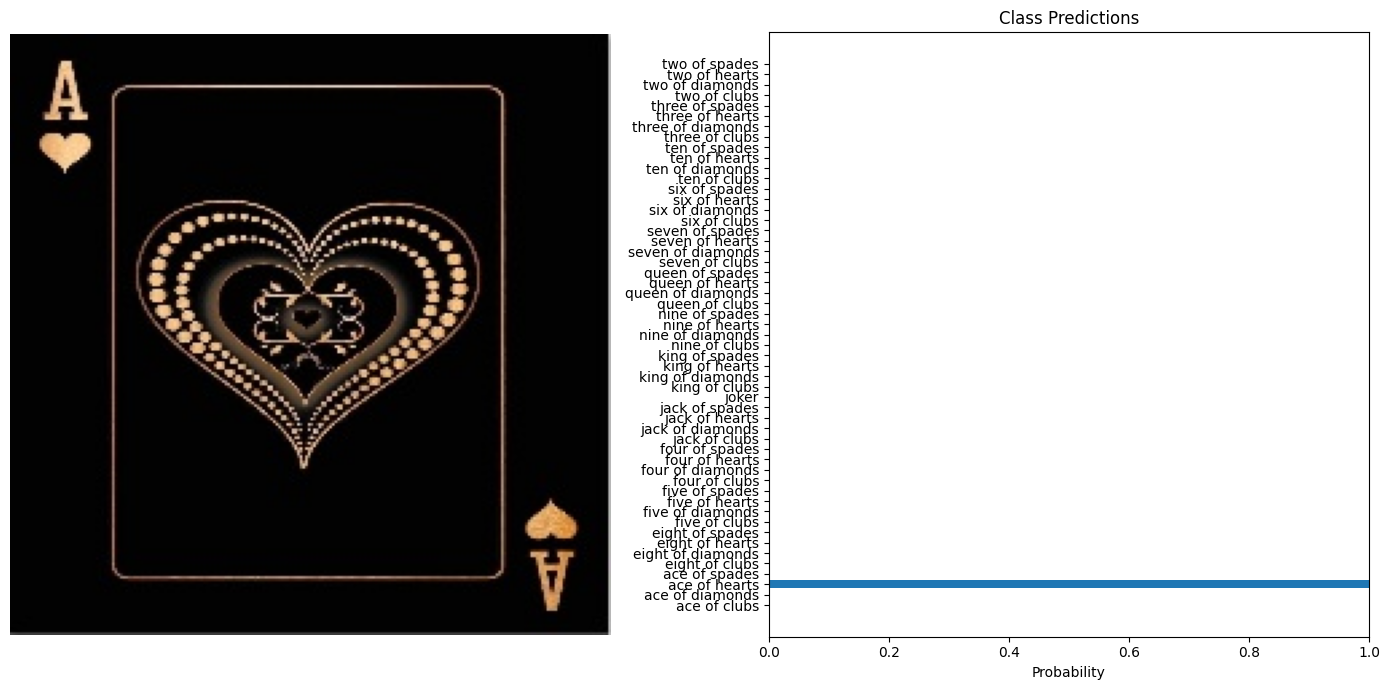

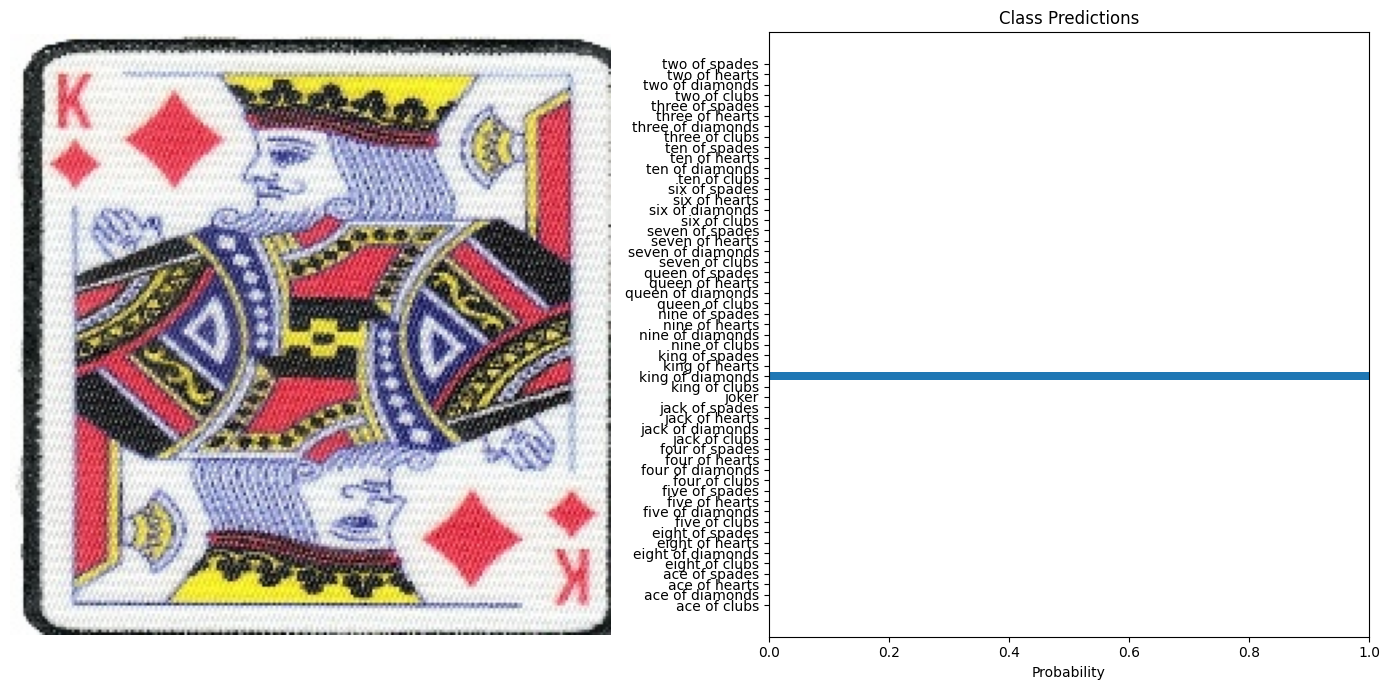

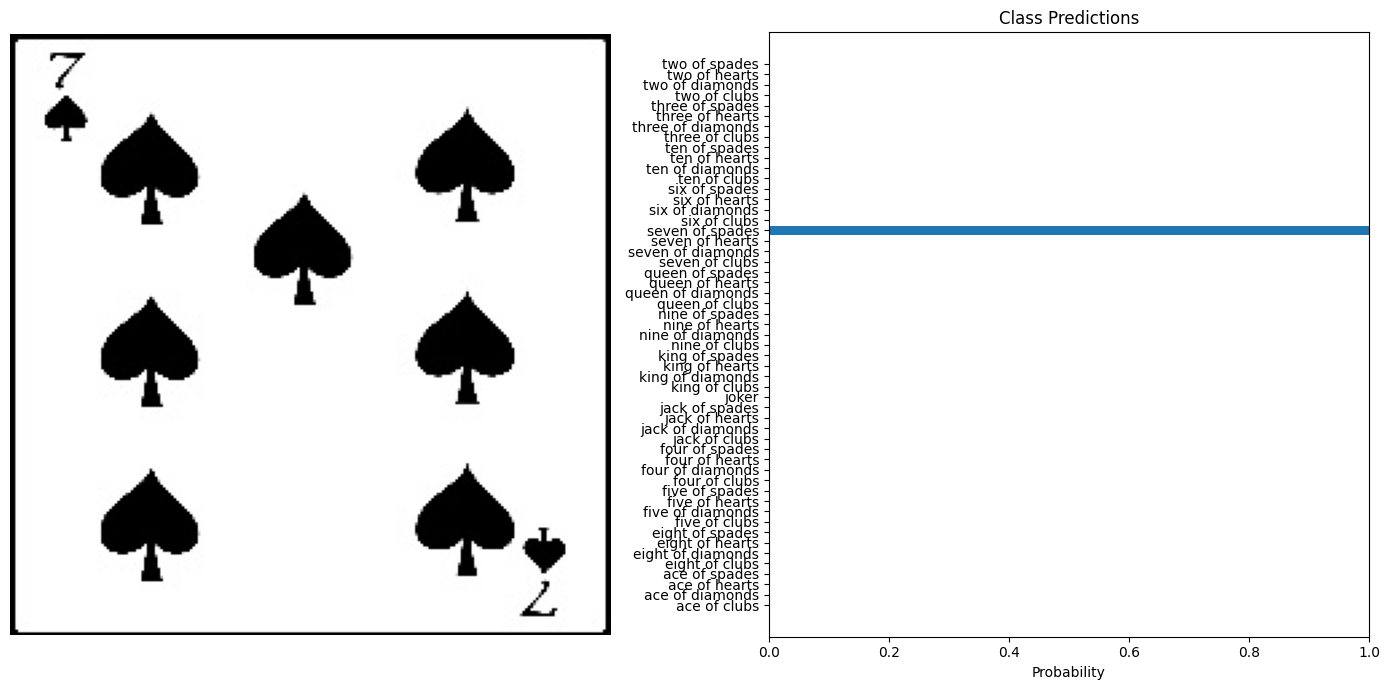

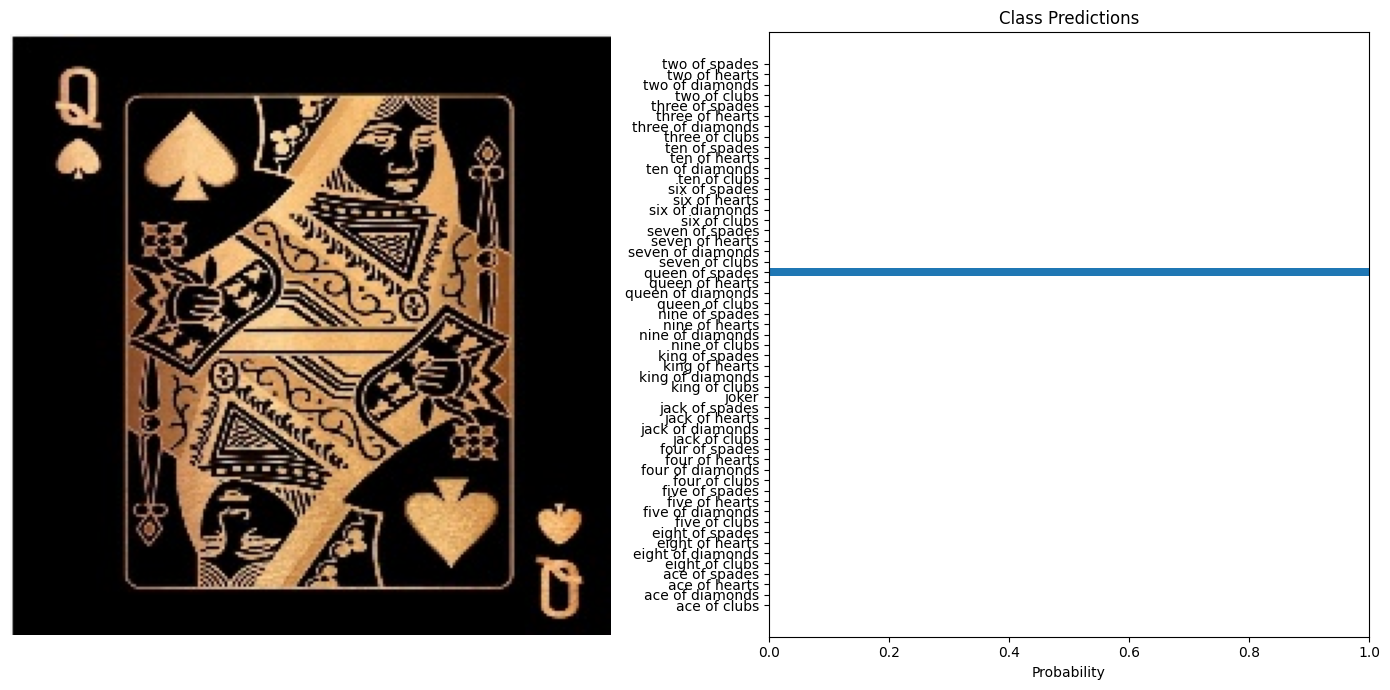

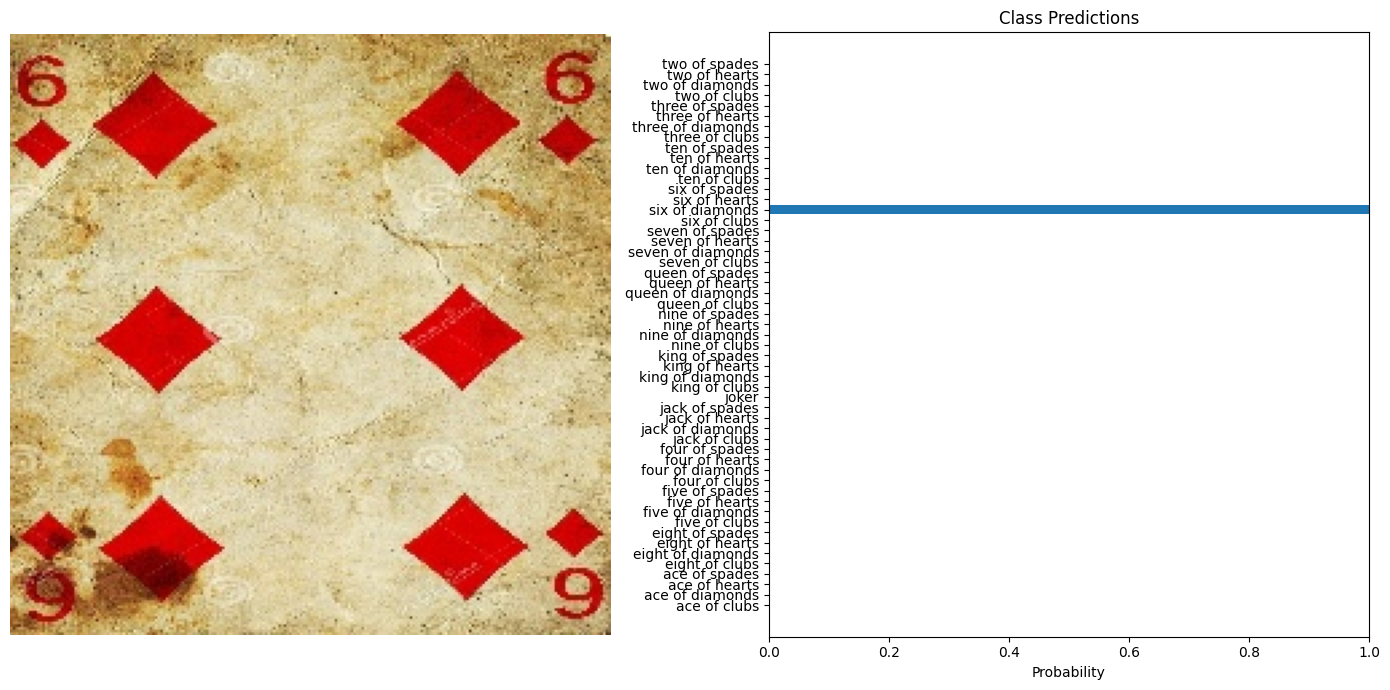

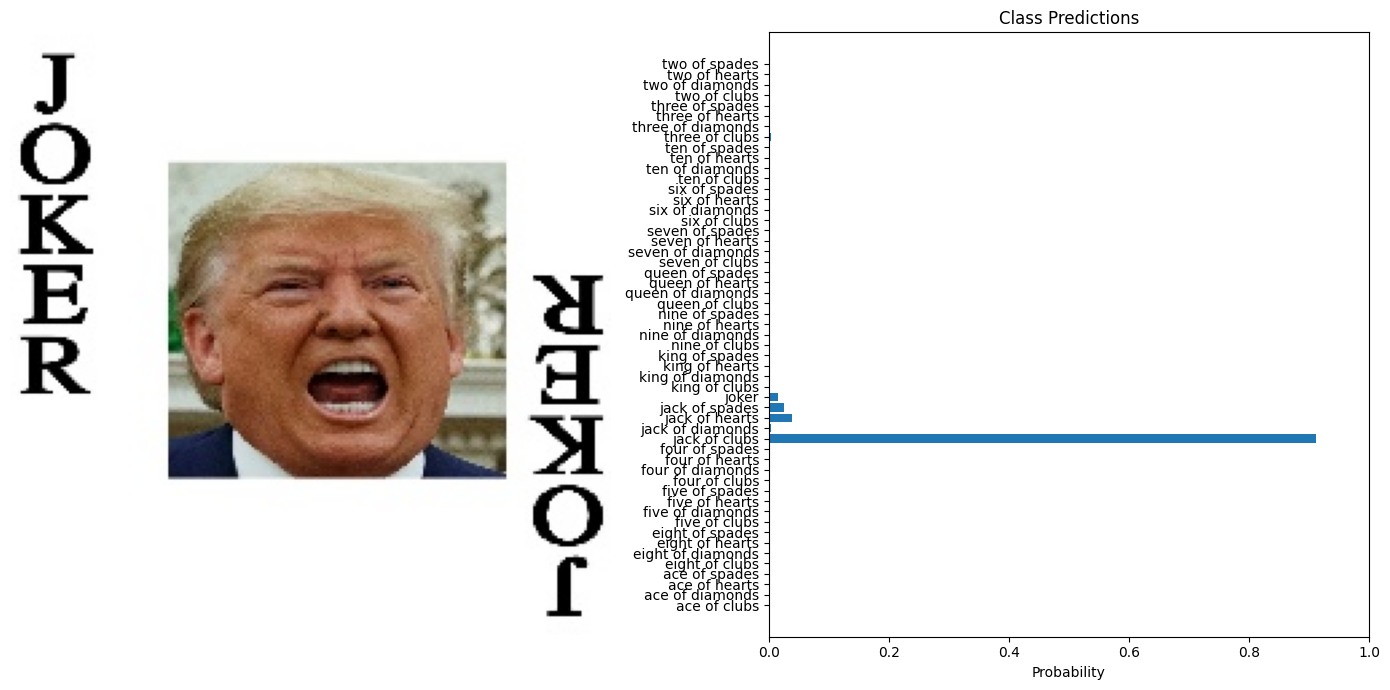

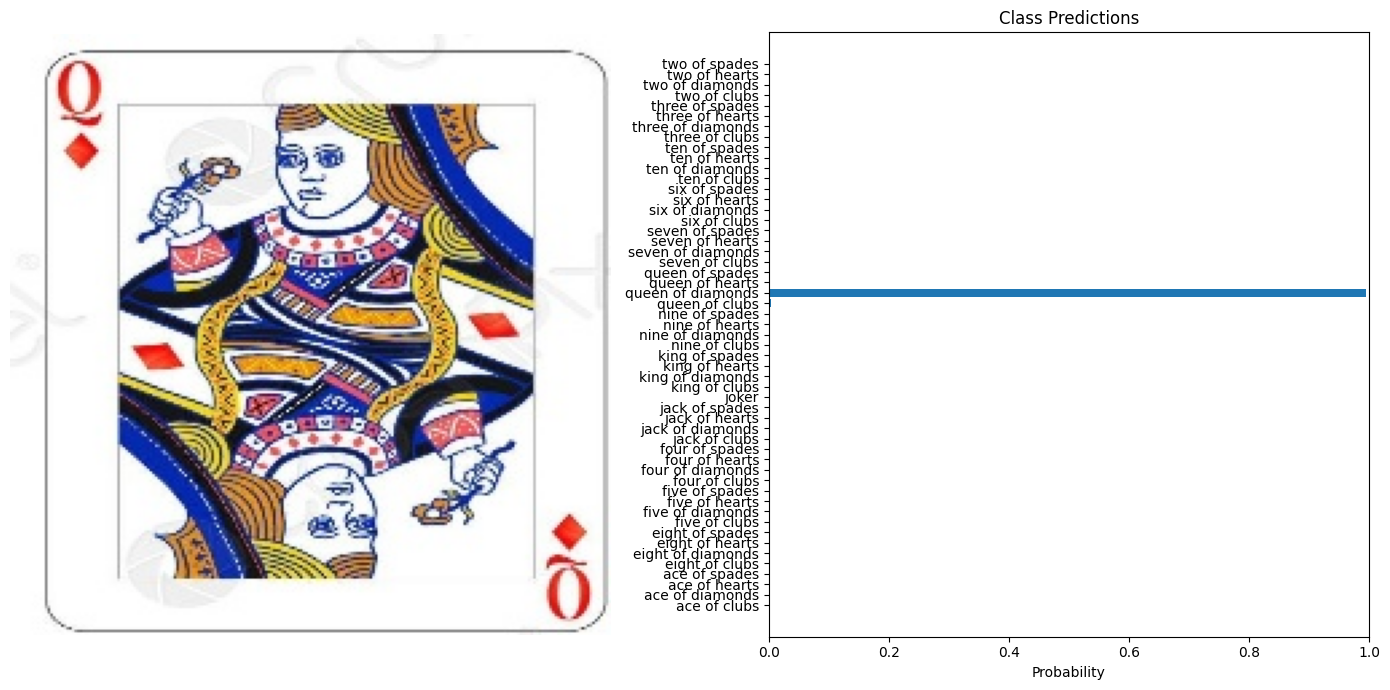

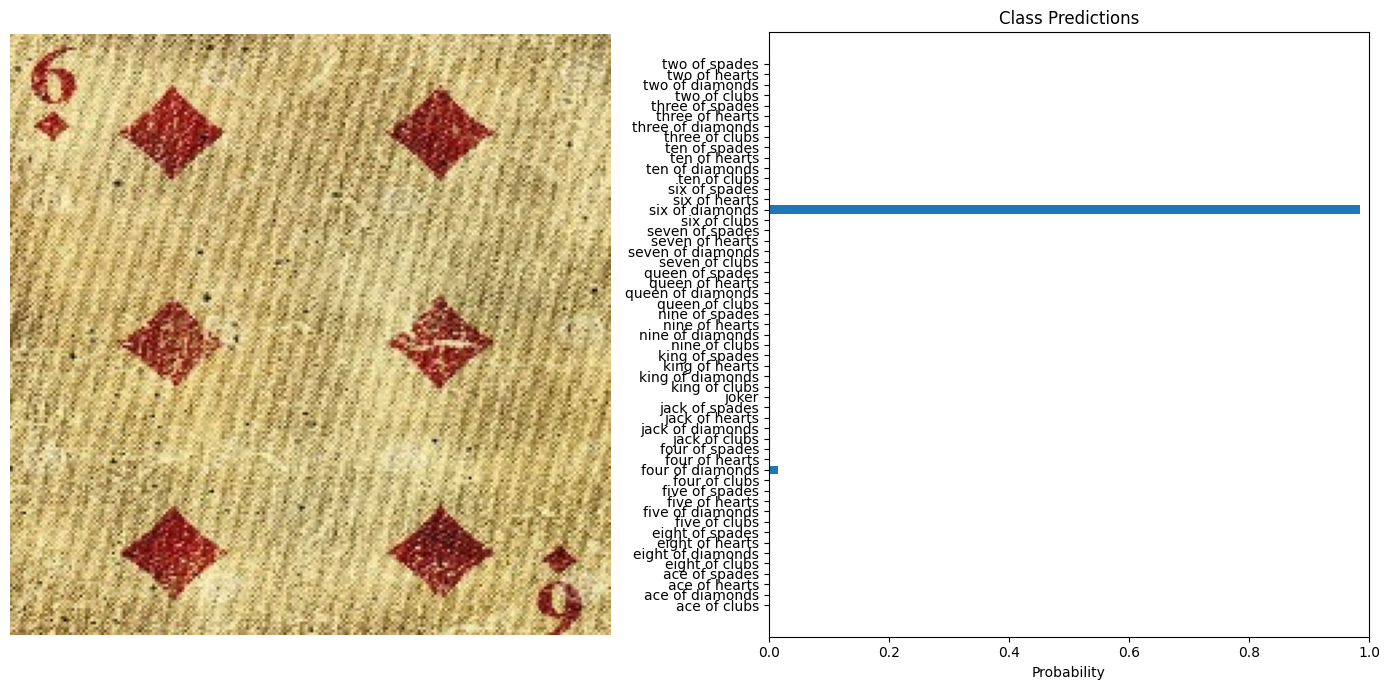

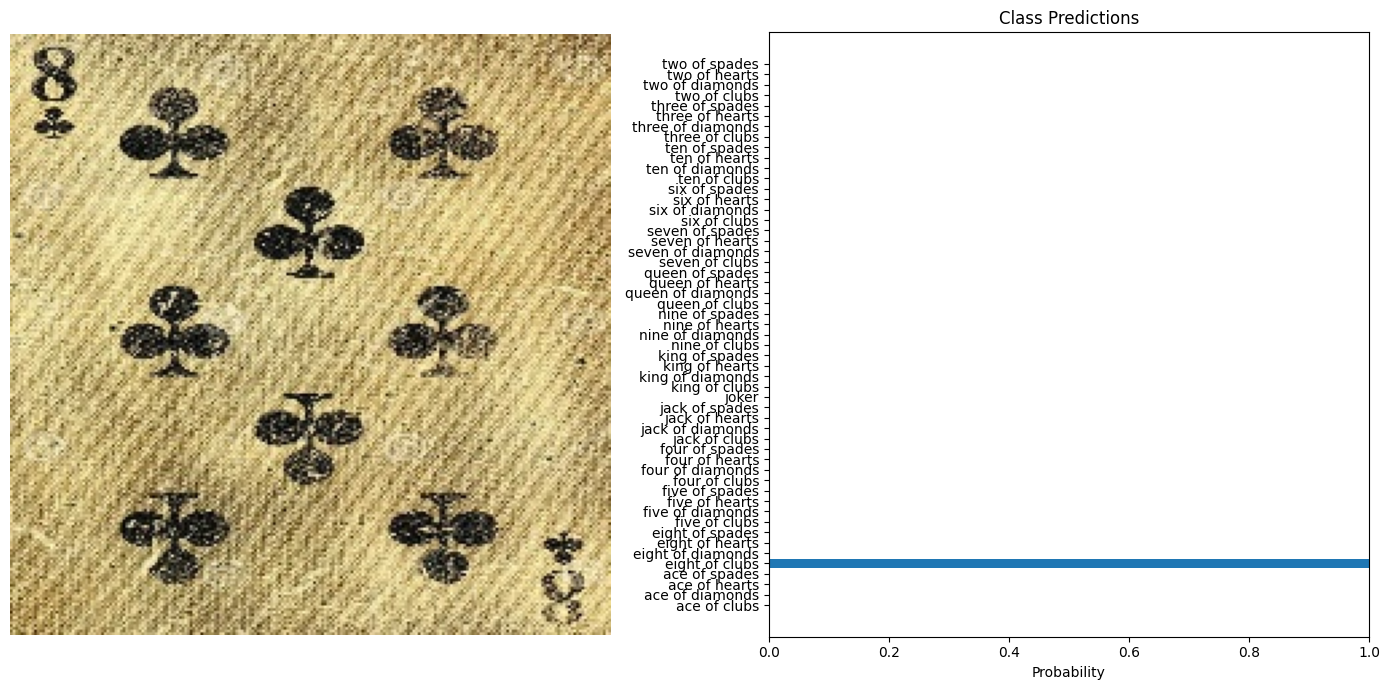

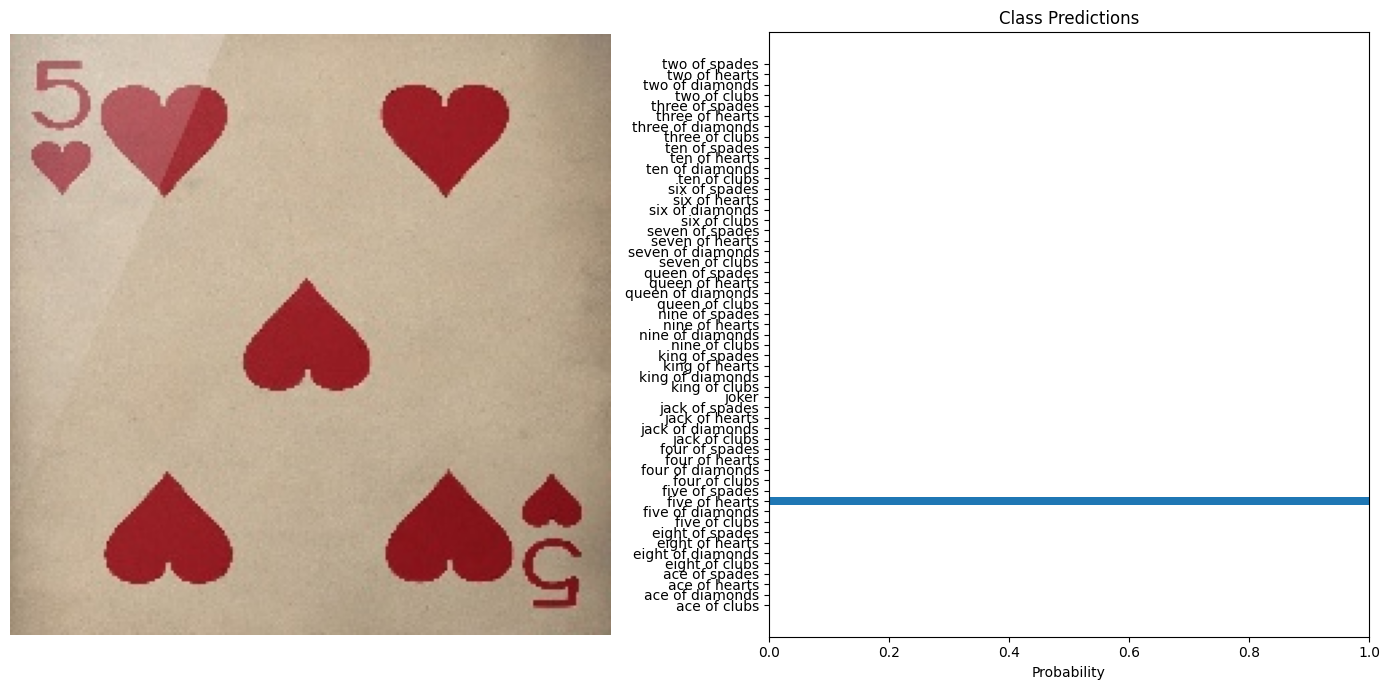

In [ ]:
from PIL import Image
from glob import glob
from google.colab import files
from io import BytesIO

# Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# Visualization
def visualize_predictions(original_image, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))

    # Display image
    axarr[0].imshow(original_image)
    axarr[0].axis("off")

    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

# Example usage
from glob import glob
test_images = glob('/content/test/*/*')
test_examples = np.random.choice(test_images, 10)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)

    # Assuming dataset.classes gives the class names
    class_names = dataset.classes
    visualize_predictions(original_image, probabilities, class_names)
